**Alumno: Brian Alex Fuentes Acuña**

**Padron: 101785**


# Clase 6: Solución de la ecuación de estado y discretización

## Introducción

Hasta ahora encontramos diversas formas de representar sistemas con variables de estado. Descubrimos cómo llegar a estas ecuaciones a partir de la ecuación diferencial o en diferencias de un modelo. Sabemos que podemos aplicar transformaciones, que son cambios de base del espacio de estados, y que nos pueden servir para pasar de una descripción o otra. Nos puede ser útil para simplificar los problemas que vamos a encontrar o para hacer análisis de los sistemas.

Además, vimos una forma particular, llamada de Jordan, que simplifica la ecuación de estados al desacoplar las ecuaciones y dejar expuestos los diversos modos de un sistema. En definitiva, de una forma u otra, llegamos a modelos de la forma:

$$ \dot{x}(t) = A x(t) + B u(t) $$
$$ y(t) = C x(t) + D u(t) $$

o

$$ x(k+1) = A x(k) + B u(k) $$
$$ y(k) = C x(k) + D u(k) $$

dependiendo si el sistema es de tiempo continuo o discreto. También vimos que estos modelos describen posiblemente incrementos alrededor de las trayectorias nominales o puntos de trabajo de los sistemas físicos en estudio.

Nos queda resolver una pregunta: ¿Cuál es la solución de estas ecuaciones? ¿Cómo hallamos la evolución del vector de estado en el tiempo $x(t)$ o $x(k)$?

## Solución y la matriz de transición de estados

Ya vimos en la teórica cuál es la solución de cada una de estas ecuaciones. Para el caso LTI en tiempo continuo:

$$ x(t) = \Phi(t-t_0)x(t_0) + \int_{t_0}^{t} \Phi(t-\tau) B u(\tau) d\tau$$

Donde 

$$ \Phi(t-t_0) = e^{A(t-t_0)} $$

es la matriz de transición de estado en tiempo continuo. En sistemas LTI es igual a la matriz exponencial.

Para el caso LTI en tiempo discreto:

$$ x(k) = \Phi(k -k_0) x(k_0) + \sum_{i=k_0}^{k-1} \Phi(k-i-1) B u(i) $$

Donde 

$$\Phi (k-k_0) = A^{k-k_0}$$

es la matriz de transición de estado en tiempo discreto.

Ambas soluciones poseen dos términos, el primero es la respuesta del estado ante las condiciones iniciales no nulas, también denominada respuesta libre, o con entrada nula. El segundo corresponde a la respuesta forzada o para condiciones iniciales nulas.

### ¿Cómo hallar la matriz de transición de estados?

#### Tiempo continuo

La definición de matriz exponencial es a través de la serie:

$$ e^M = \sum_{i=1}^{\infty} \frac{M^i}{i!} = I + M + \frac{M^2}{2} + \frac{M^3}{6} + ... $$

Y de aparecer el tiempo involucrado, simplemente es un número real a los efectos de su cálculo:

$$ e^{At} = \sum_{i=1}^{\infty} \frac{(At)^i}{i!} = I + At + \frac{A^2 t^2}{2} + \frac{A^3 t^3}{6} + ... $$

Es importante entonces notar que es una matriz $ \in \mathbb{R}^{n\times n}$ , para un vector de estado $x \in \mathbb{R}^n$. Y por más que la definición lo indica, aclaramos que no es lo mismo hacer la exponencial de cada elemento de la matriz.

#### Tiempo discreto

La matriz de transición de estados en tiempo discreto es mucho más simple de hallar:

$$ \Phi(k - k_0) = A^{k-k_0}$$

En donde la potencia $k-k_0$ es un número natural representando las $k-k_0$ transiciones del vector de estado, y en el caso que $k = k_0$, $\Phi(0) = I_{n\times n}$. Para obtenerla, se debe calcular simplemente de la siguiente manera:

$$ \Phi(k-k_0) = \underbrace{A A \dots A}_{k-k_0 \text{veces}} $$

### Ejemplo: Cálculo de la matriz exponencial con A diagonalizable.

Dado el sistema:

$$\dot{x} = A x$$

Con

$$ A = \begin{bmatrix} -7 & 2 & 1\\ 4 & -5 & -4\\ 0 & 0 & -6 \end{bmatrix} $$

y condición inicial $x_0 = \begin{bmatrix} 0 & 0 & 1 \end{bmatrix}^T$

Queremos calcular la evolución del sistema desde $x(0)=x_0$ hasta $x(5)$.

Para esto necesitamos la matriz de transición de estados:

$$ x(t_1) = \Phi(t_1-t_0) x(t_0) $$

Que en el caso de $t_1 = 5$, $t_0 = 0$, y el sistema LTI es:

$$ x(5) = e^{5A}x(t_0) $$

Si A es diagonalizable:

$$A = M \Delta M^{-1}$$

Luego, aplicamos la definición:

$$ e^{5A} = \sum_{i=1}^{\infty} \frac{(5A)^i}{i!} =  \sum_{i=1}^{\infty} \frac{5^i (M \Delta M^{-1})^i}{i!} $$

Notamos que la potencia $i$ de las matrices da:

$$ (M\Delta M^{-1} )^i =  M \Delta \underbrace{M^{-1} M}_I \Delta M^{-1} \dots M \Delta \underbrace{^{-1} M}_I \Delta M^{-1}= M \Delta^i M^{-1} $$

Y por ser matriz diagonal, la potencia $i$ de $\Delta$ se calcula mucho más fácil. Salen las matrices M y su inversa de la sumatoria como factores comunes a izquierda y a derecha, y queda:

$$ e^{5A} = M E M^{-1} $$

Donde cada elemento de la diagonal de E será:

$$ e_{jj} = \sum_{i=1}^{\infty} \frac{\lambda_j^i 5^i}{i!} = e^{5\lambda_j}$$

El cálculo de la matriz exponencial queda:

$$ e^{5A} = M \begin{bmatrix} e^{5\lambda_1} & 0 & 0 \\ 0 & e^{5\lambda_2} & 0 \\ 0 & 0 & e^{5\lambda_3}\end{bmatrix} M^{-1} $$

El resultado buscado es:

$$ x(5) =  M \begin{bmatrix} e^{5\lambda_1} & 0 & 0 \\ 0 & e^{5\lambda_2} & 0 \\ 0 & 0 & e^{5\lambda_3}\end{bmatrix} M^{-1}x(t_0) $$

Resolvemos por simulación:

In [ ]:
import numpy as np
from scipy.linalg import expm

A = np.matrix([[-7, 2, 1],[4, -5, -4],[0, 0, -6]])
x01 = np.matrix([[0],[0],[1]])
t = 5
#print('\n A =', A)
#print('\n X01 =', x01)

autoval, M = np.linalg.eig(A)
D = np.diag(autoval)
print('\n D =', D)
print('\n M =', M)


 D = [[-9.  0.  0.]
 [ 0. -3.  0.]
 [ 0.  0. -6.]]

 M = [[-7.07106781e-01 -4.47213595e-01  7.07106781e-01]
 [ 7.07106781e-01 -8.94427191e-01  1.58187870e-17]
 [ 0.00000000e+00  0.00000000e+00  7.07106781e-01]]


Como es diagonalizable podemos continuar con el procedimiento propuesto.

In [ ]:
D_5 = np.diag(np.exp(t*autoval))
x5 = M*D_5*np.linalg.inv(M)*x01
print('El estado en t =', t, 'vale \n x=\n', x5)

El estado en t = 5 vale 
 x=
 [[-1.01967347e-07]
 [-2.03934880e-07]
 [ 9.35762297e-14]]


Podemos verificar con el cálculo directo:

In [ ]:
x5 = expm(t*A)*x01
print('El estado en t =', t, 'vale \n x=\n', x5)

El estado en t = 5 vale 
 x=
 [[-1.01967347e-07]
 [-2.03934880e-07]
 [ 9.35762297e-14]]


## Discretización exacta

Una aplicación interesante de la solución de la ecuación de estado en tiempo continuo es la discretización de un sistema para hallar un sistema en tiempo discreto equivalente. Repasamos primero esta idea a continuación.

Queremos desarrollar un controlador en tiempo discreto del sistema:

$$ \dot{z} = A z + B u $$
$$ y = C z + D u $$

con una computadora. Para ello ya sabemos que vamos a tener que elegir un tiempo de muestreo $T_S$ acorde a nuestros objetivos de control, las características del sistema a controlar y las capacidades de cálculo de nuestra computadora. Cada $T_S$ segundos vamos a estar muestreando la señal de interés o salida $y(t). 

Asimismo, vamos a tener que definir cómo vamos a accionar la entrada de este sistema. El controlador va a calcular cada $T_S$ segundos un valor actualizado de acción de control $u(t)$. Una de las formas más simples de generar esta señal, es dejar su valor constante durante el período de muestreo. Es lo que se conoce como retenedor de orden cero  o ZOH, que viene del inglés _zero order hold_.

El esquema que ejecuta estas dos acciones, la de muestrear $y(t)$ y la de retener el valor de $u(t)$, es el siguiente:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1IFMfkWQBZ_x4IpwSaGHSy61irY4irEM9'/>
<figcaption>Retenedor y muestreo para discretizar</figcaption></center>
</figure


De donde se va a obtener un sistema en tiempo discreto equivalente de la forma:

$$ z(k+1) = A_d z(k) + B_d u(k) $$
$$ y(k) = C z(k) + D u(k) $$

Esto es, nos podemos olvidar del sistema en tiempo continuo y directamente trabajar con el nuevo modelo en tiempo discreto para diseñar un controlador como indica la siguiente figura:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1n7XTkE99YPE23bjuF0YyXb65X4C7kgj_'/>
<figcaption>Sistema equivalente con controlador digital</figcaption></center>
</figure

Y luego, volver al sistema físico y aplicar la ley de control encontrada.

Partimos entonces de $t_0 = kT_S$, que en la solución de la ecuación de da que:

$$ z(t) = e^{A(t-k T_S)}z(kT_S) + \int_{kT_S}^{t} e^{A(t-\tau)} B u(\tau) d\tau$$

Y calculamos cómo evoluciona el estado durante un período de muestreo, o sea hasta $t = kT_S + T_S$:

$$ z(kT_S+T_S) = e^{AT_S}z(kT_S) + \int_{kT_S}^{kT_S+T_S} e^{A(kT_S+T_S-\tau)} B u(\tau) d\tau$$

De allí sale, si consideramos el efecto del ZOH, que:

$$ z(k+1) = A_d z(k) + B_d u(k) $$

Con 

$$ A_d = e^{AT_S} $$

y 

$$ B_d = \int_0^{T_S} e^{A\alpha} d\alpha B $$

**Ejercicio:** Demostrar el paso para hallar la expresión de $B_d$.

**RTA:**
partiendo de:
$$ z(kT_S+T_S) = e^{AT_S}z(kT_S) + \int_{kT_S}^{kT_S+T_S} e^{A(kT_S+T_S-\tau)} B u(\tau) d\tau$$
se tiene $\alpha = kT_S+T_S-\tau$, donde  $d \alpha = -d \tau$
entonces 
$\tau = kT_S, \alpha= T_S$
y
$\tau = kT_S + T_S, \alpha= 0$

Aplicando el cambio de variable se tiene:
$$ z(kT_S+T_S) = e^{AT_S}z(kT_S) - \int_{T_S}^{0} e^{A\alpha}d\alpha B  d\alpha$$
y como $u(\tau)$ es constante en el intervalo de integracion, se puede sacar fuera de la integral.

$$ z(kT_S+T_S) = e^{AT_S}z(kT_S) + (\int_{0}^{T_S} e^{A\alpha}d\alpha B  ) u(\tau)$$

con $T_S$ implicito

$$ z(k+1) = A_d z(k) + B_d u(k) $$

---
Para los casos en donde A no es inversible, no nos servirá la expresión para $B_d$ encontrada en la clase teórica. Entonces, en el caso más general deberemos hallar una expresión de la función matricial $\Phi(t) = e^{At}$ para luego integrar y calcular $B_d$ con la expresión dada.

¡Probemos esta discretización con un ejemplo!

## Tarea:

Dado el circuito RLC de la clase 3, propongo hallar un sistema en tiempo discreto equivalente con el método de discretización exacta.

La ecuación de estado era:

$$ \mathbf{\dot{x}} =  \begin{bmatrix} 0 & 1\\ -\frac{1}{LC} & -\frac{2}{RC} \end{bmatrix} \mathbf{x} + \begin{bmatrix} 0 \\ 1\end{bmatrix} u$$

$$ y = \begin{bmatrix}-\frac{1}{LC} -\frac{1}{RC} \end{bmatrix} \mathbf{x} + u $$



In [ ]:
# Aquí va tu código
!pip install control
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt
import sympy as symb
import scipy as sp

R = 20  # Ohm
C = 5e-6  # F
L = 10e-6  # H
Ts = 2e-7#... Completá con el valor que creas adecuado
tiempo_inicial = 0; tiempo_final =1 ; paso_tiempo = 2e-6 ;# Ajustar los tiempos
tiempo = np.arange(tiempo_inicial, tiempo_final, paso_tiempo)

A = symb.Matrix([[1, 1], [-1/(L*C), -2/(R*C)]])
B = symb.Matrix([[0], [1]])
C = symb.Matrix([[-1/(L*C), -1/(R*C)]])
D = symb.Matrix([1])
print('\n A =') 
symb.pprint(A)
A.eigenvals()


 A =
⎡      1            1    ⎤
⎢                        ⎥
⎣-20000000000.0  -20000.0⎦


{-9999.5 + 141067.324351708*I: 1, -9999.5 - 141067.324351708*I: 1}

 **1)**

 *Convertir el sistema a la forma de Jordan. Dejar expresada la ecuación de estado en su forma con coeficientes reales. Usar como pista el ejercicio 7 de la guía 2.*
 
 **RTA:**

  Usando los resultados del ejercicio 7 de la guia 2:
  
  $\lambda_{1,2}= \alpha \pm j\beta$ con $\alpha$ y $\beta \in \mathbb{R}$
  entonces

  $v_{2,3}= u \pm jw$ , $M=[u |w]$

  $$ M^{-1}AM= \begin{bmatrix}\alpha&\beta\\-\beta&\alpha \end{bmatrix} $$

  Se Calcula $M$ y se realiza la transformacion, para luego corroborar con lo que deberia obtener

  Obteniendo la siguiente forma:
  $$ M^{-1}AM= \begin{bmatrix}−9999.5&(-141067.324351708)\\-(-141067.324351708)&−9999.5 \end{bmatrix} $$
 

In [ ]:
#Busco la forma de jordan:
P, J= A.jordan_form(); 
#Observar que la forma de jordan es compleja.
print('P= \n');   symb.pprint(P)
print('J= \n');   symb.pprint(J)
#Busco la forma de llevarlo a la expresion real mostrada.
alpha, beta= J[0, 0].as_real_imag()
u, w = P[:,0].as_real_imag()
#Armo la matriz M.
M= symb.Matrix()
M= M.col_insert(1, u)
M= M.col_insert(2, w)
#Imprimo la transformacion M^-1.A.M:
print('M^-1.A.M: \n');  symb.pprint(M.inv()*A*M)
#Compruebo con la forma cerrada que deberia obtener.
print('La forma cerrada: ')
symb.Matrix( [[alpha, beta], [-beta, alpha]] )

###En el John bay hay metodos de hallar la exp matricial en funcion del tiempo.

P= 

⎡-5.00025e-7 + 7.0533662175854e-6⋅ⅈ  -5.00025e-7 - 7.0533662175854e-6⋅ⅈ⎤
⎢                                                                      ⎥
⎣               1.0                                 1.0                ⎦
J= 

⎡-9999.5 - 141067.324351708⋅ⅈ               0              ⎤
⎢                                                          ⎥
⎣             0                -9999.5 + 141067.324351708⋅ⅈ⎦
M^-1.A.M: 

⎡    -9999.5       -141067.324351708⎤
⎢                                   ⎥
⎣141067.324351708       -9999.5     ⎦
La forma cerrada: 


Matrix([
[         -9999.5, -141067.324351708],
[141067.324351708,           -9999.5]])

**2)**

*Seleccionar un valor de $T_S$ que considere adecuado. Explicar el criterio adoptado.*

**RTA:**

El sistema a simular será el siguiente:
$$ \mathbf{\dot{x}} =  \begin{bmatrix} 0 & 1\\ -\frac{1}{LC} & -\frac{2}{RC} \end{bmatrix} \mathbf{x} + \begin{bmatrix} 0 \\ 1\end{bmatrix} u$$

$$ y = \begin{bmatrix}-\frac{1}{LC} -\frac{1}{RC} \end{bmatrix} \mathbf{x} + u $$
Para discretizar primero tengo que ver el tiempo de muestreo.

Voy a querer que mi señal discretizada copie lo mejor posible la continua, por lo que por Nyquist sé que el periodo de muestreo $T_S$ tiene que ser menor que la mitad del periodo de mi señal $T$.

Entonces voy a elegir en principio $T_S= T/4$ para poder ver la discretizacion de mi señal.

En caso de que este tiempo no sea suficiente para que el sistema aproximado sea estable se usará el mismo dado en el ejercicio 3 $Ts= 2.10^{-7}$ < $\frac{T}{2}$[Seg].

Entonces solo queda definir quien es $T$. la forma facil es verlo a ojo en el grafico de la respuesta al escalón pero es mejor buscar quien es la frecuencia natural analiticamente.

Dado que tengo los polos del sistema de segundo orden (Por que mi sistema es desegundo orden) por definicion la parte imaginaria será quien me dé la frecuencia natural de oscilacion.

Se obtendran los polos obteniendo los autovalores de la matriz de estado A.

Periodo naturar de la señal 0.04454033090976047
T/4  [mSeg] 0.011135082727440118
Ts= [mSeg] 0.00019999999999999998


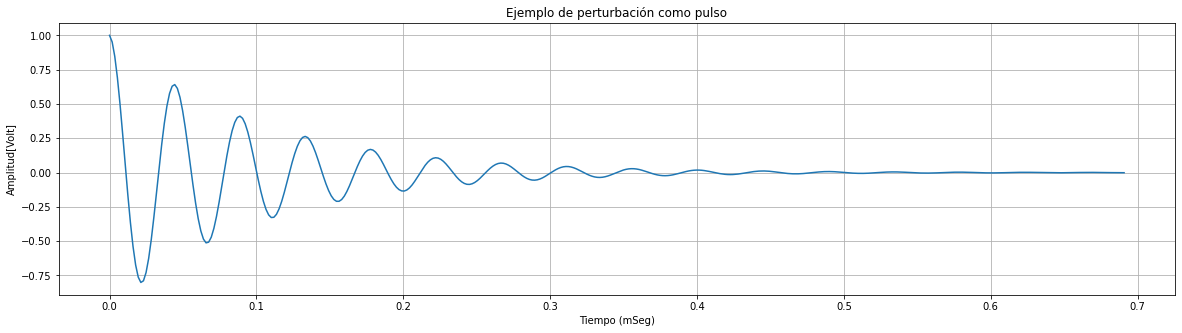

In [ ]:
#Creo el sistema en espacio de estados:
SS_c = ctrl.StateSpace(A, B ,C, D)

#Para discretizar primero tengo que ver el tiempo de muestreo.
#Voy a querer que mi señal discretizada copie lo mejor posible la continua.
wd= 141067.324351708  #[1/s]frecuencia natural amortiguada.(la parte imaginaria de los polos del sistema)
T= 2*np.pi/(wd)       #[s] 
#Ts=T/4               #Periodo de muestreo.
print('Periodo naturar de la señal', 1000*T)
print('T/4  [mSeg]', 1000*T/4)
#Debido a que mas adelante este Ts no es suficiente 
#para la discretizacion aproximada, se usa para todos Ts= 2e-7 < T/4             (Ts ya definida)
print('Ts= [mSeg]', 1000*Ts)
t_c, z_c = ctrl.step_response(SS_c)

fig = plt.figure(figsize=(20,5))
plt.plot(1000*t_c, z_c)
plt.title('Ejemplo de perturbación como pulso')
plt.ylabel('Amplitud[Volt]')
plt.xlabel('Tiempo (mSeg)')
plt.grid()
plt.show()

#ctrl.pzmap(SS_c, grid=True, title='Polos y ceros del sistema continuo')
#El sistema es estable.

**3)** 

*Aplicar la discretización exacta.*

**RTA:**

Para aplicar la discretizacion exacta, se usa la discretizacion ZOH la cual fue mostrada arriba.
pero se elige hacer un paso mas.

Como se vio en la teorica si el **det(A) $\neq$ 0** entonces se puede discretizar de la siguiente forma:

$$A_d = e^{AT}$$ $$B_d = A^{−1}(Ad − I)B$$

Observar que en el diagrama de polos y ceros todos ellos estan dentro del circulo unitario, osea que se cumple que la discretizacion ZOH trasnforma polos continuos estables en polos discretos estables.

Por ello se llama discretizacion exacta.

determinante de A: 19999980000.0000
eig: {0.997604920179148 - 0.0281533617879672*I: 1, 0.997604920179148 + 0.0281533617879672*I: 1}
|0.997604920179148 - 0.0281533617879672*j|= 0.998


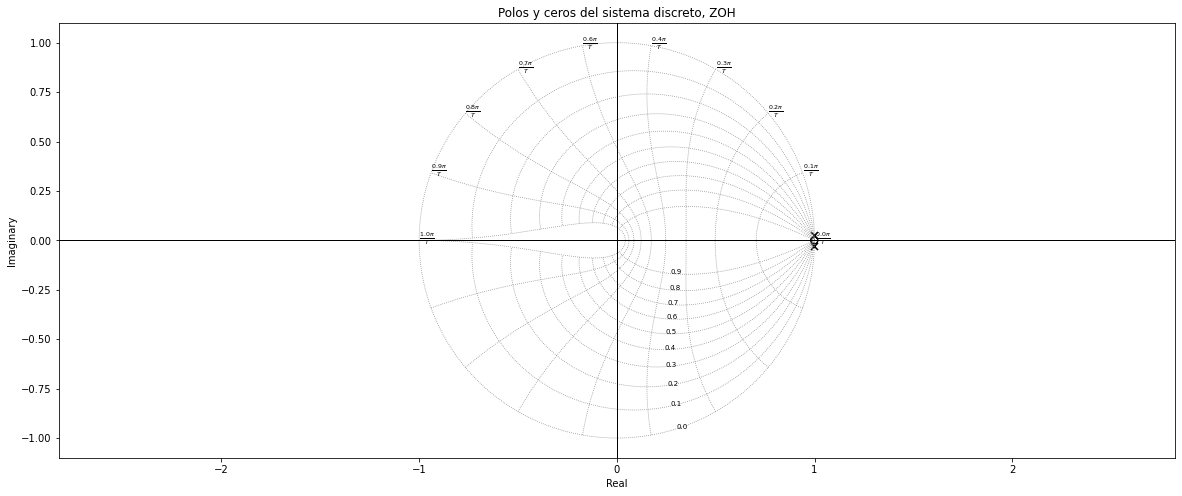

In [ ]:
#Efectivamente el determinante es distinto de cero.
print('determinante de A:',A.det())
#Se puede usar la discretizacion propuesta.

Ad_zoh= (A*Ts).exp() #/(1e5)  #exp() Devuelve el exponencial de una matriz cuadrada
#Ad_zoh= expm(Ts*A)
Bd_zoh= A.inv('CH')*( Ad_zoh - symb.eye(2) )*B

eig= Ad_zoh.eigenvals()
print("eig:", eig) ########## ES DE MODULO < 1.
print('|0.997604920179148 - 0.0281533617879672*j|=', 0.9980)

#Y vuelvo a definir otro sistema pero ya para tiempo discreto.
SSd_zoh = ctrl.StateSpace(Ad_zoh, Bd_zoh ,C, D, Ts)

#Grafico los polos y ceros.
fig = plt.figure(figsize=(20, 8))
ctrl.pzmap(SSd_zoh, grid=True, title= 'Polos y ceros del sistema discreto, ZOH')
#plt.xlim(-1,1)
plt.show()

#La respuesta al impulso:
t_d_zoh, z_d_zoh = ctrl.step_response(SSd_zoh)




**4)**

*Aplicar la discretización aproximada (repasar los primeros minutos de https://youtu.be/jkW_Lco_A50). ¿Cómo se relaciona esta aproximación con la que hicimos en la clase 3?*

**RTA:**

Para aplicar la discretización aproximada se usa:
$$ A_{d_{euler}}= (I - TA)$$
$$ B_{d_{euler}}= TB $$

Notar que para llegar a esas ecuaciones se plantea la siguiente aproximacion en espacio de estados:

$$  \dot{x}(t) = \lim\limits_{T \to 0} \frac{x(t + T) − x(t)}{T}= Ax(t) + Bu(t) $$
 entonces reordenando
$$ x(t + T) \approx x(t) + T Ax(t) + T Bu(t) $$
mientras que en el ejercicio 3 se hacia algo similar pero se aplicaban directamente en la ecuacion diferencial.

$$\frac{df}{dt}= \dot{f} \approx\frac{f(t + Δt) − f(t)}{Δt}$$
$$\frac{d^2f}{d^2t} \approx\frac{\dot{f}(t + Δt) − \dot{f}(t)}{Δt}$$
estas aproximaciones se aplicaron directamente en la ecuacion diferencial del problema.
y se obtuvieron distintas matrices de estados con los dos metodos, por lo que no son iguales.


eig: {0.9980001 - 0.0282134648703416*I: 1, 0.9980001 + 0.0282134648703416*I: 1}


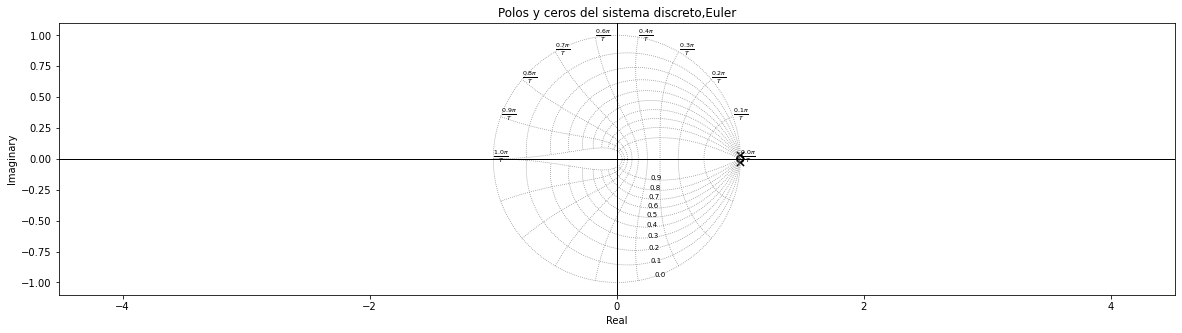

In [ ]:
#Aplico las transformaciones para el metodo aproximado(Euler).
#Ts= 2e-7  #[seg.] del TP3.
Ad_e= symb.eye(2) + Ts*A
Bd_e= Ts*B

#Verifico si es estable.
eig1= Ad_e.eigenvals()
print("eig:", eig1) ########## ES DE MODULO < 1.

#Defino el sistema discreto aproximado.
SSd_e = ctrl.StateSpace(Ad_e, Bd_e ,C, D,Ts)

#Grafico los polos y ceros para ver si es estable..
fig = plt.figure(figsize=(20,5))
ctrl.pzmap(SSd_e, grid=True, title='Polos y ceros del sistema discreto,Euler')

#Obtengo la respusta al escalon
t_d_e, z_d_e = ctrl.step_response(SSd_e)


**5)** 

*Comparar la respuesta al escalón de las dos discretizaciones, exacta y aproximada, y con la del sistema en tiempo continuo original.*

**RTA:**

Se grafican las tres respuestas al escalón para hacer comparaciones gráficas y se puede ver que la discretización por ZOH aproxima perfectamente a la respuesta continúa, más teniendo en cuenta el Ts usado.
La solución aproxima, Euler, es buena pero no tanto como ZOH de hecho tiene una diferencia porcentual del 50% respecto de la respuesta continua.



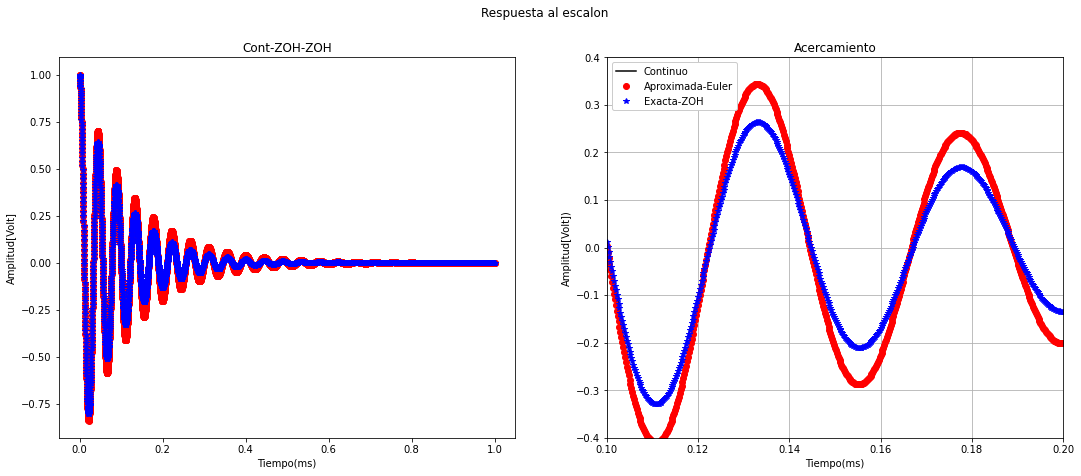

In [ ]:
#Graficos las respuestas al escalon de los tres metodos.
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('Respuesta al escalon')

ax1.plot(1000*t_c, z_c, 'k-', label='Continuo')
ax1.plot(1000*t_d_e, z_d_e, 'ro', label= 'Aproximada-Euler')
ax1.plot(1000*t_d_zoh, z_d_zoh,'b*', label= 'Exacta-ZOH')
ax1.set_title("Cont-ZOH-ZOH")

ax2.plot(1000*t_c, z_c, 'k-', label='Continuo')
ax2.plot(1000*t_d_e, z_d_e, 'ro', label= 'Aproximada-Euler')
ax2.plot(1000*t_d_zoh, z_d_zoh,'b*', label= 'Exacta-ZOH')
ax2.set_title("Acercamiento")

#se observan mayores diferencias entre estos limites.
ax2.set_xlim(0.1, 0.2)
ax2.set_ylim(-0.4, 0.4)
plt.grid()
ax1.set(xlabel='Tiempo(ms)', ylabel='Amplitud[Volt]')
ax2.set(xlabel='Tiempo(ms)', ylabel='Amplitud[Volt])')

plt.legend(loc='upper left',framealpha=1, frameon=True)
plt.show()
fig.tight_layout()

**6)**

*Explorar la función directa que le proporciona el simulador para discretizar y verifique el método que utiliza.*

**RTA:**

Se hará uso de:

*sys disc = control.sample_system(sysc, Ts, method='zoh', alpha=None)*
 
 * Ts: el tiempo de muestreo.
 * method: ZOH por defecto o 'tustin'
 * sync: el sistema en continuo a discretizar
 una función trasferencia o en espacio de estado
 * sys disc: el resultado en tiempo discreto, una función trasferencia o en espacio de estado.

 El método de tustin es igual de bueno que el ZOH por lo que los siguientes gráficos se muestran muy similares ya que no hay diferencias apreciables a simple vista.
 
 Se con concluye que ambos métodos son buenos y que la función dada por el simulador es similar al implementado por lo que vale la pena usarlo.


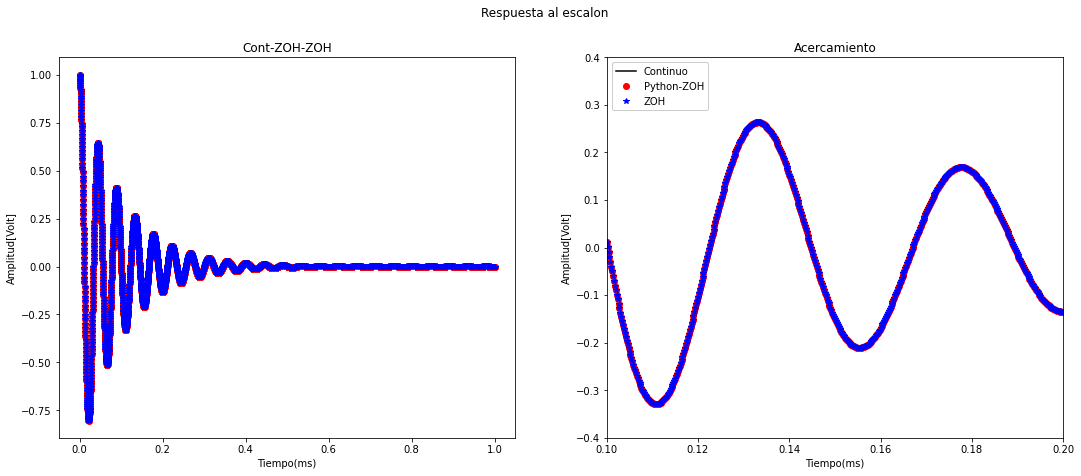

In [ ]:
#Comparacion con ZOH dado por el paquete de control de python.
SS_py= ctrl.sample_system(SS_c, Ts, method='zoh')
t_py, z_py= ctrl.step_response(SS_py)

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('Respuesta al escalon')

ax1.plot(1000*t_c, z_c, 'k-', label= 'Continuo')
ax1.plot(1000*t_py, z_py, 'ro', label= 'Python-ZOH')
ax1.plot(1000*t_d_zoh, z_d_zoh,'b*', label= 'ZOH')

ax1.set_title("Cont-ZOH-ZOH")

ax2.plot(1000*t_c, z_c, 'k-', label= 'Continuo')
ax2.plot(1000*t_py, z_py, 'ro', label= 'Python-ZOH')
ax2.plot(1000*t_d_zoh, z_d_zoh,'b*', label= 'ZOH')
ax2.set_title("Acercamiento")

#se observan mayores diferencias entre estos limites.
ax2.set_xlim(0.1, 0.2)
ax2.set_ylim(-0.4, 0.4)

ax1.set(xlabel='Tiempo(ms)', ylabel='Amplitud[Volt]')
ax2.set(xlabel='Tiempo(ms)', ylabel='Amplitud[Volt]')

plt.legend(loc='upper left',framealpha=1, frameon=True)
plt.show()
fig.tight_layout()

#NO HAY DIFERENCIAS ENTRE ZOH PYTHON Y EL MIO



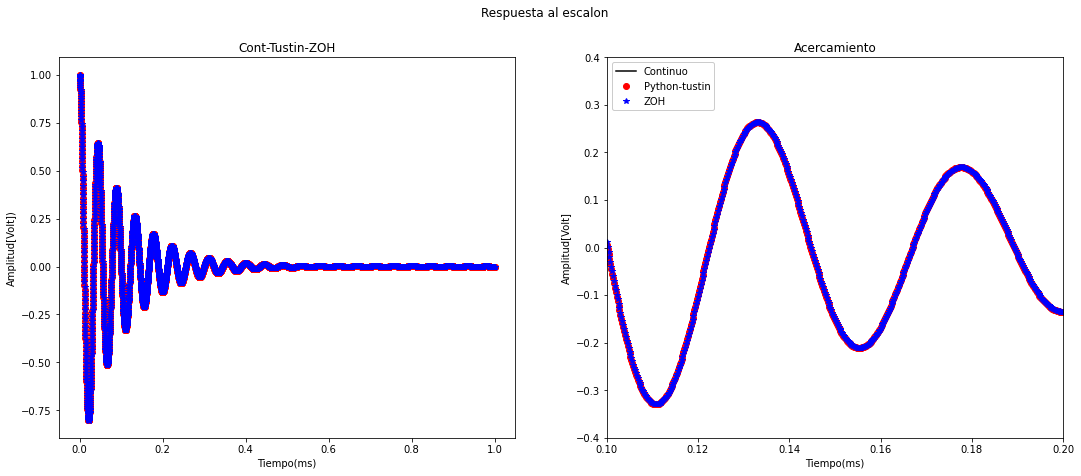

In [ ]:
#Comparacion con Tustin dado por el paquete de control de python.
SS_py= ctrl.sample_system(SS_c, Ts, method='tustin')
t_py, z_py= ctrl.step_response(SS_py)

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('Respuesta al escalon')

ax1.plot(1000*t_c, z_c, 'k-', label= 'Continuo')
ax1.plot(1000*t_py, z_py, 'ro', label= 'Python-tustin')
ax1.plot(1000*t_d_zoh, z_d_zoh,'b*', label= 'ZOH')

ax1.set_title("Cont-Tustin-ZOH")

ax2.plot(1000*t_c, z_c, 'k-', label= 'Continuo')
ax2.plot(1000*t_py, z_py, 'ro', label= 'Python-tustin')
ax2.plot(1000*t_d_zoh, z_d_zoh,'b*', label= 'ZOH')
ax2.set_title("Acercamiento")

ax2.set_xlim(0.1, 0.2)
ax2.set_ylim(-0.4, 0.4)

ax1.set(xlabel='Tiempo(ms)', ylabel='Amplitud[Volt])')
ax2.set(xlabel='Tiempo(ms)', ylabel='Amplitud[Volt]')

plt.legend(loc='upper left',framealpha=1, frameon=True)
plt.show()
fig.tight_layout()

#EL METODO DE PYTHON APROXIMA MEJOR, POR EL METODO TUSTIN EN REALIDAD.

*Por ultimo a modo completitud se grafican todas las respuiestas al escalon obtenidas para tener un panorama general.
Todas son buenas aproximacioones excepto el apriximado (Euler)*

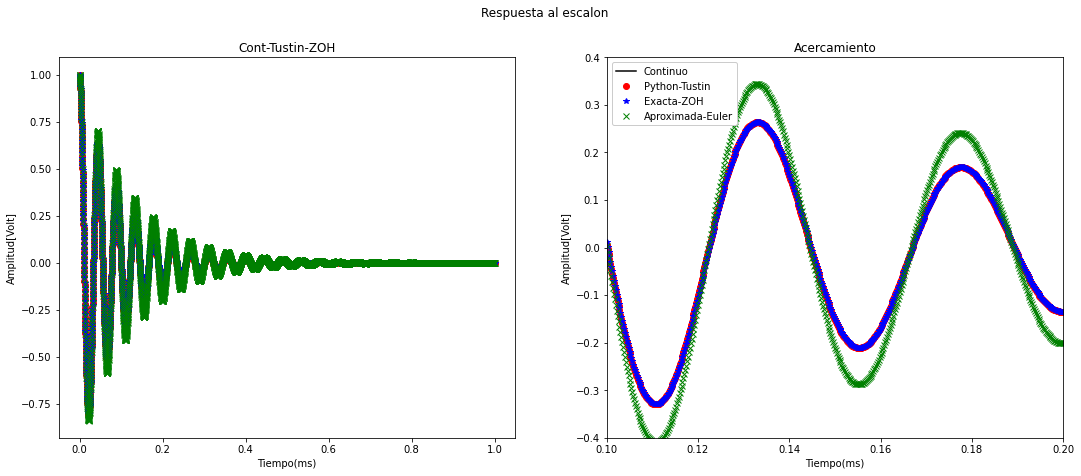

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('Respuesta al escalon')

ax1.plot(1000*t_c, z_c, 'k-', label= 'Continuo')
ax1.plot(1000*t_py, z_py, 'ro', label= 'Python-Tustin')
ax1.plot(1000*t_d_zoh, z_d_zoh,'b*', label= 'Exacta-ZOH')
ax1.plot(1000*t_d_e, z_d_e,'gx', label= 'Aproximada-Euler')

ax1.set_title("Cont-Tustin-ZOH")

ax2.plot(1000*t_c, z_c, 'k-', label= 'Continuo')
ax2.plot(1000*t_py, z_py, 'ro', label= 'Python-Tustin')
ax2.plot(1000*t_d_zoh, z_d_zoh,'b*', label= 'Exacta-ZOH')
ax2.plot(1000*t_d_e, z_d_e,'gx', label= 'Aproximada-Euler')
ax2.set_title("Acercamiento")

#se observan mayores diferencias entre estos limites.
ax2.set_xlim(0.1, 0.2)
ax2.set_ylim(-0.4, 0.4)

ax1.set(xlabel='Tiempo(ms)', ylabel='Amplitud[Volt]')
ax2.set(xlabel='Tiempo(ms)', ylabel='Amplitud[Volt]')

plt.legend(loc='upper left',framealpha=1, frameon=True)
plt.show()
fig.tight_layout()


